# Ćwiczenie 1

Importowanie potrzebnych bibliotek

In [1]:
import random
from math import pi,sqrt,cos,sin
import matplotlib.pyplot as pyplot
import numpy as np

Wyznacznik 1: 3x3 liczony samodzielnie

In [2]:
def det1(a,b,c,eps):
    d = (a[0]*b[1]+b[0]*c[1]+a[1]*c[0])-(b[1]*c[0]+a[1]*b[0]+a[0]*c[1])
    if abs(d)<eps:
        return 0       # współliniowe
    elif d<0:
        return -1       # c po prawej
    else:
        return 1        # c po lewej

Wyznacznik 2: 2x2 liczony samodzielnie

In [3]:
def det2(a,b,c,eps):
    d = (a[0]-c[0])*(b[1]-c[1])-(b[0]-c[0])*(a[1]-c[1])
    if abs(d)<eps:
        return 0       # współliniowe
    elif d<0:
        return -1       # c po prawej
    else:
        return 1        # c po lewej

Wyznacznik 3: 3x3 przy użyciu bibliotek numerycznych

In [4]:
def det3(a,b,c,eps):
    v = np.array([[a[0],a[1],1],[b[0],b[1],1],[c[0],c[1],1]])
    d = np.linalg.det(v)
    if abs(d)<eps:
        return 0       # współliniowe
    elif d<0:
        return -1       # c po prawej
    else:
        return 1        # c po lewej

Wyznacznik 4: 2x2 przy użyciu bibliotek numerycznych

In [5]:
def det4(a,b,c,eps):
    v = np.array([[a[0]-c[0],a[1]-c[1]],[b[0]-c[0],b[1]-c[1]]])
    d = np.linalg.det(v)
    if abs(d)<eps:
        return 0       # współliniowe
    elif d<0:
        return -1       # c po prawej
    else:
        return 1        # c po lewej

Generowanie losowych punktów z przedziału

In [6]:
def randomPoints(start, stop, n):
    arrA=[0]*n
    arrB=[0]*n
    for i in range(n):
        arrA[i]=random.random()*2*stop+start+random.random()
        arrB[i]=random.random()*2*stop+start+random.random()
    return arrA,arrB

Generowanie  losowych punktów na okręgu

In [7]:
def randomPointsCircle(R,n):
    arrA=[0]*n
    arrB=[0]*n
    for i in range(n):
        a = random.random()*2*pi
        arrA[i]=R*cos(a)
        arrB[i]=R*sin(a)
    return arrA,arrB

Generowanie  losowych punktów leżących na linii

In [8]:
def randomPointsLine(start,stop,vec,n,b):
    arrA=[0]*n
    arrB=[0]*n
    a = (vec[1][1]-vec[0][1])/(vec[1][0]-vec[0][0])
    for i in range(n):
        r = random.random()*2*stop+start+random.random()
        while r*a > stop or r*a < start:
            r = random.random() * 2 * stop + start + random.random()
        arrA[i]=r
        arrB[i]=r*a+b
    return arrA,arrB


Funkcje dokonujące podziału na punkty współliniowe, po lewej oraz po prawej stronie linii wyznaczonej przez wektor (a,b) dla każdego z czterech wyznaczników

In [9]:
def split1(X,Y,a,b,eps):
    leftX = []
    leftY = []
    rightX = []
    rightY = []
    lineX = []
    lineY = []

    
    
    for i in range(len(X)):
        if det1(a,b,(X[i],Y[i]),eps)==-1:
            rightX.append(X[i])
            rightY.append(Y[i])
        elif det1(a,b,(X[i],Y[i]),eps)==1:
            leftX.append(X[i])
            leftY.append(Y[i])
        else:
            lineX.append(X[i])
            lineY.append(Y[i])

    pyplot.plot(leftX,leftY,'rs',rightX,rightY,'bs',lineX,lineY,'gs')
    pyplot.show()

    print("Podział wg det1:")
    print("Dla epsilon=",eps)
    print("Right",len(rightX))
    print("Left",len(leftX))
    print("In line", len(lineX))
    print("********************************************************")
    
def split2(X,Y,a,b,eps):
    leftX = []
    leftY = []
    rightX = []
    rightY = []
    lineX = []
    lineY = []


    for i in range(len(X)):
        if det2(a,b,(X[i],Y[i]),eps)==-1:
            rightX.append(X[i])
            rightY.append(Y[i])
        elif det2(a,b,(X[i],Y[i]),eps)==1:
            leftX.append(X[i])
            leftY.append(Y[i])
        else:
            lineX.append(X[i])
            lineY.append(Y[i])

    pyplot.plot(leftX,leftY,'rs',rightX,rightY,'bs',lineX,lineY,'gs')
    pyplot.show()

    print("Podział wg det2:")
    print("Dla epsilon=",eps)
    print("Right", len(rightX))
    print("Left", len(leftX))
    print("In line", len(lineX))
    print("********************************************************")    

    
    
def split3(X,Y,a,b,eps):
    leftX = []
    leftY = []
    rightX = []
    rightY = []
    lineX = []
    lineY = []


    for i in range(len(X)):
        d = det3(a,b,[X[i],Y[i]],eps)
        if d<0:
            rightX.append(X[i])
            rightY.append(Y[i])
        elif d>0:
            leftX.append(X[i])
            leftY.append(Y[i])
        else:
            lineX.append(X[i])
            lineY.append(Y[i])

    pyplot.plot(leftX,leftY,'rs',rightX,rightY,'bs',lineX,lineY,'gs')
    pyplot.show()

    print("Podział wg det3:")
    print("Dla epsilon=",eps)
    print("Right", len(rightX))
    print("Left", len(leftX))
    print("In line", len(lineX))
    print("********************************************************")


def split4(X,Y,a,b,eps):
    leftX = []
    leftY = []
    rightX = []
    rightY = []
    lineX = []
    lineY = []


    for i in range(len(X)):
        d = det4(a,b,[X[i],Y[i]],eps)
        if d<0:
            rightX.append(X[i])
            rightY.append(Y[i])
        elif d>0:
            leftX.append(X[i])
            leftY.append(Y[i])
        else:
            lineX.append(X[i])
            lineY.append(Y[i])

    pyplot.plot(leftX,leftY,'rs',rightX,rightY,'bs',lineX,lineY,'gs')
    pyplot.show()

    print("Podział wg det4:")
    print("Dla epsilon=",eps)
    print("Right", len(rightX))
    print("Left", len(leftX))
    print("In line", len(lineX))
    print("********************************************************")
    

In [10]:
pAx,pAy=randomPoints(-1000,1000,10**5)
pBx,pBy=randomPoints(-10**14, 10**14, 10**5)
pCx,pCy=randomPointsCircle(100,1000)
pDx,pDy=randomPointsLine(-1000,1000,[(-1.0,0),(1.0,0.1)],1000,0.05)

In [11]:
eps1 = 10**(-14)
eps2 = 10**(-12)
eps3 = 10**(-10)
eps4 = 10**(-8)

a=[-1.0,0.0]
b=[1.0,0.1]

random.seed(200)

## Podziały według det1

### Zestaw A

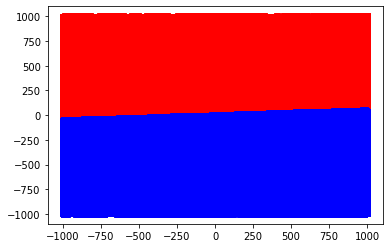

Podział wg det1:
Dla epsilon= 1e-14
Right 49726
Left 50274
In line 0
********************************************************


In [12]:
split1(pAx,pAy,a,b,eps1)

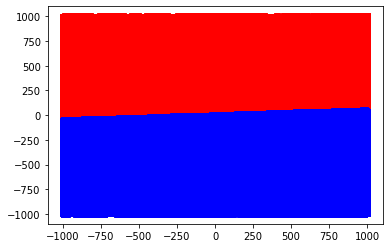

Podział wg det1:
Dla epsilon= 1e-12
Right 49726
Left 50274
In line 0
********************************************************


In [13]:
split1(pAx,pAy,a,b,eps2)

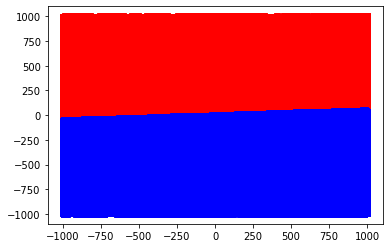

Podział wg det1:
Dla epsilon= 1e-10
Right 49726
Left 50274
In line 0
********************************************************


In [14]:
split1(pAx,pAy,a,b,eps3) 

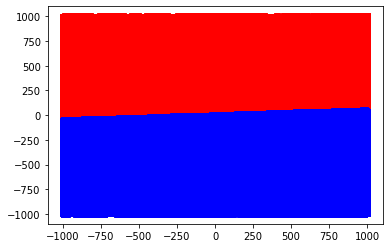

Podział wg det1:
Dla epsilon= 1e-08
Right 49726
Left 50274
In line 0
********************************************************


In [15]:
split1(pAx,pAy,a,b,eps4)

### Zestaw B

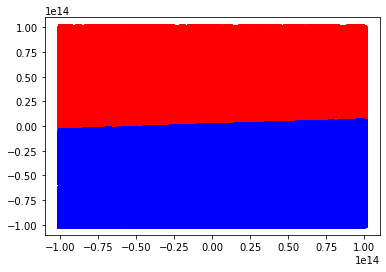

Podział wg det1:
Dla epsilon= 1e-14
Right 49786
Left 50214
In line 0
********************************************************


In [16]:
split1(pBx,pBy,a,b,eps1)

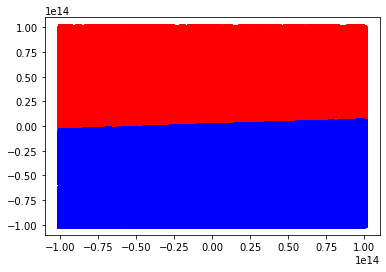

Podział wg det1:
Dla epsilon= 1e-12
Right 49786
Left 50214
In line 0
********************************************************


In [17]:
split1(pBx,pBy,a,b,eps2)  

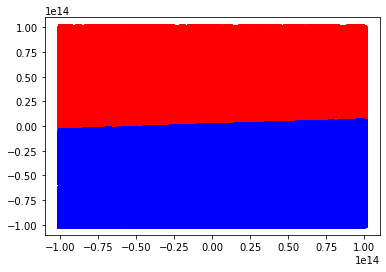

Podział wg det1:
Dla epsilon= 1e-10
Right 49786
Left 50214
In line 0
********************************************************


In [18]:
split1(pBx,pBy,a,b,eps3)

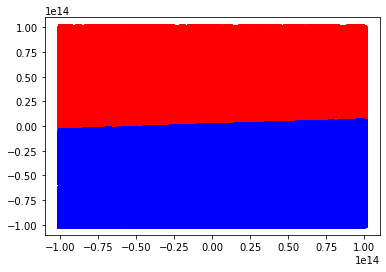

Podział wg det1:
Dla epsilon= 1e-08
Right 49786
Left 50214
In line 0
********************************************************


In [19]:
split1(pBx,pBy,a,b,eps4)  

### Zestaw C

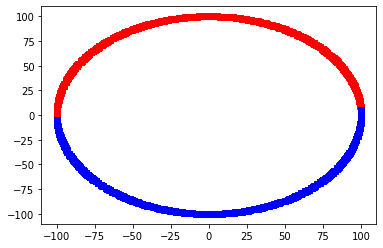

Podział wg det1:
Dla epsilon= 1e-14
Right 516
Left 484
In line 0
********************************************************


In [20]:
split1(pCx, pCy, a, b,eps1)

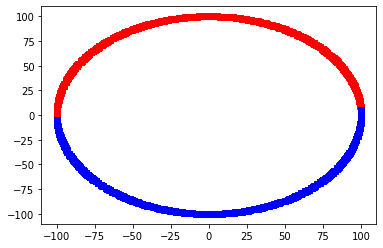

Podział wg det1:
Dla epsilon= 1e-12
Right 516
Left 484
In line 0
********************************************************


In [21]:
split1(pCx, pCy, a, b,eps2)  

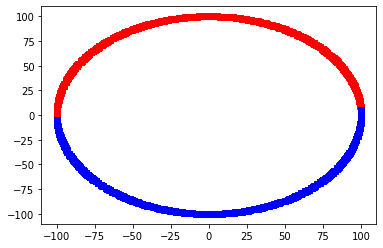

Podział wg det1:
Dla epsilon= 1e-10
Right 516
Left 484
In line 0
********************************************************


In [22]:
split1(pCx, pCy, a, b,eps3)  

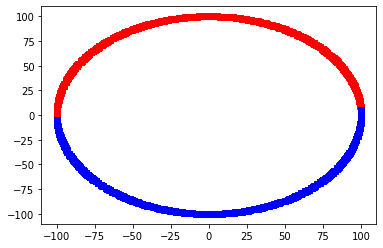

Podział wg det1:
Dla epsilon= 1e-08
Right 516
Left 484
In line 0
********************************************************


In [23]:
split1(pCx, pCy, a, b, eps4)   

### Zestaw D

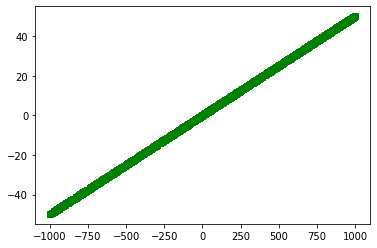

Podział wg det1:
Dla epsilon= 1e-14
Right 0
Left 0
In line 1000
********************************************************


In [24]:
split1(pDx, pDy, a, b,eps1)

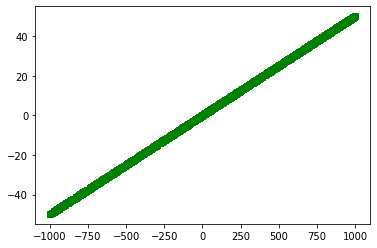

Podział wg det1:
Dla epsilon= 1e-12
Right 0
Left 0
In line 1000
********************************************************


In [25]:
 split1(pDx, pDy, a, b,eps2)

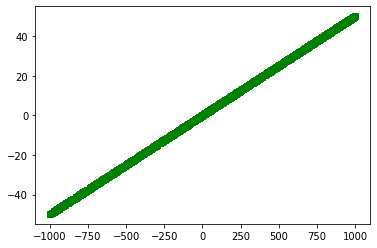

Podział wg det1:
Dla epsilon= 1e-10
Right 0
Left 0
In line 1000
********************************************************


In [26]:
split1(pDx, pDy, a, b,eps3)

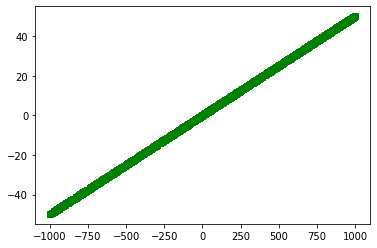

Podział wg det1:
Dla epsilon= 1e-08
Right 0
Left 0
In line 1000
********************************************************


In [27]:
split1(pDx, pDy, a, b,eps4)

## Podział według det2

### Zestaw A

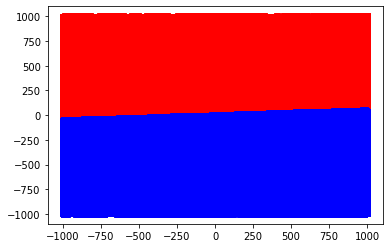

Podział wg det2:
Dla epsilon= 1e-14
Right 49726
Left 50274
In line 0
********************************************************


In [28]:
split2(pAx,pAy,a,b,eps1) 

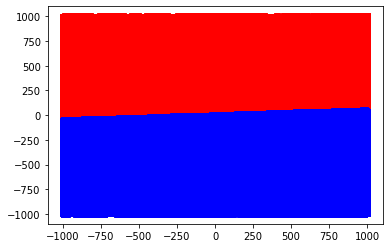

Podział wg det2:
Dla epsilon= 1e-12
Right 49726
Left 50274
In line 0
********************************************************


In [29]:
split2(pAx,pAy,a,b,eps2)    

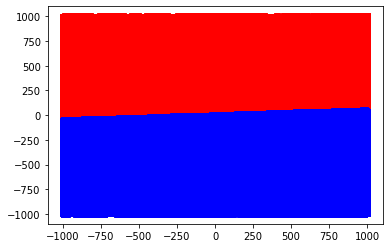

Podział wg det2:
Dla epsilon= 1e-10
Right 49726
Left 50274
In line 0
********************************************************


In [30]:
split2(pAx,pAy,a,b,eps3)    

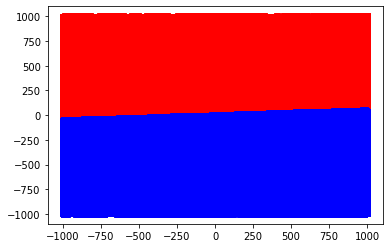

Podział wg det2:
Dla epsilon= 1e-08
Right 49726
Left 50274
In line 0
********************************************************


In [31]:
split2(pAx,pAy,a,b,eps4)    

### Zestaw B

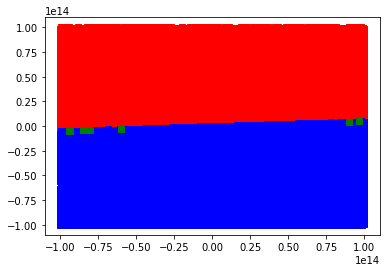

Podział wg det2:
Dla epsilon= 1e-14
Right 49780
Left 50212
In line 8
********************************************************


In [32]:
split2(pBx,pBy,a,b,eps1)    

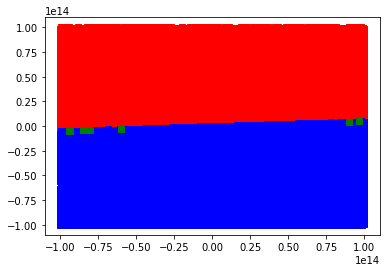

Podział wg det2:
Dla epsilon= 1e-12
Right 49780
Left 50212
In line 8
********************************************************


In [33]:
split2(pBx,pBy,a,b,eps2)    

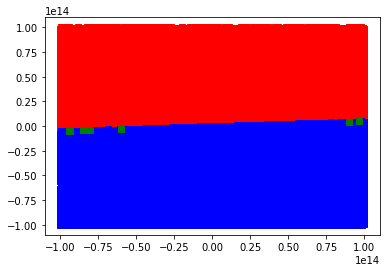

Podział wg det2:
Dla epsilon= 1e-10
Right 49780
Left 50212
In line 8
********************************************************


In [34]:
split2(pBx,pBy,a,b,eps3)    

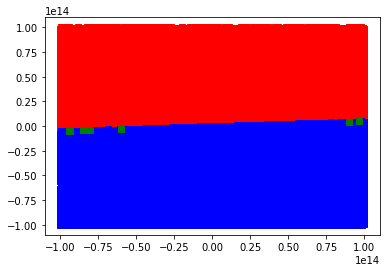

Podział wg det2:
Dla epsilon= 1e-08
Right 49780
Left 50212
In line 8
********************************************************


In [35]:
split2(pBx,pBy,a,b,eps4)   

### Zestaw C

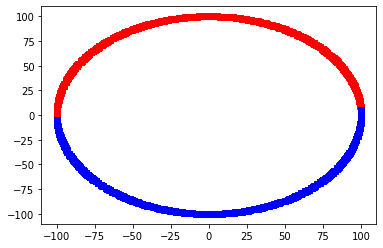

Podział wg det2:
Dla epsilon= 1e-14
Right 516
Left 484
In line 0
********************************************************


In [36]:
split2(pCx, pCy, a, b,eps1)   

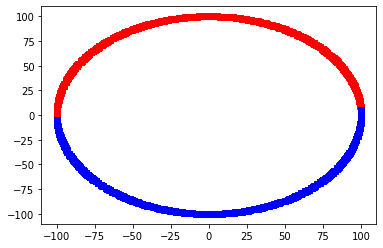

Podział wg det2:
Dla epsilon= 1e-12
Right 516
Left 484
In line 0
********************************************************


In [37]:
split2(pCx, pCy, a, b,eps2) 

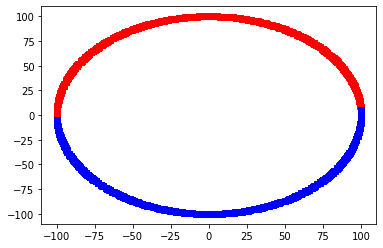

Podział wg det2:
Dla epsilon= 1e-10
Right 516
Left 484
In line 0
********************************************************


In [38]:
split2(pCx, pCy, a, b,eps3)

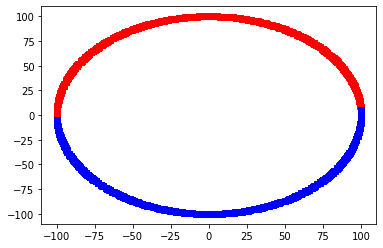

Podział wg det2:
Dla epsilon= 1e-08
Right 516
Left 484
In line 0
********************************************************


In [39]:
split2(pCx, pCy, a, b, eps4)  

### Zestaw D

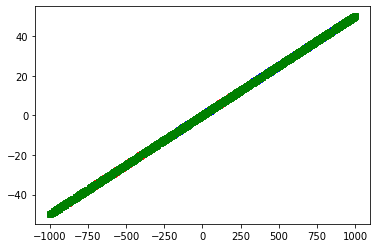

Podział wg det2:
Dla epsilon= 1e-14
Right 152
Left 134
In line 714
********************************************************


In [40]:
split2(pDx, pDy, a, b,eps1)

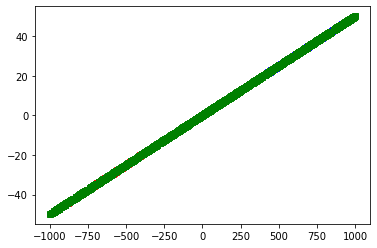

Podział wg det2:
Dla epsilon= 1e-12
Right 79
Left 71
In line 850
********************************************************


In [41]:
split2(pDx, pDy, a, b,eps2)

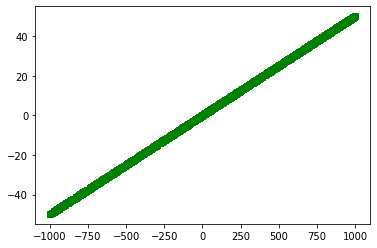

Podział wg det2:
Dla epsilon= 1e-10
Right 0
Left 0
In line 1000
********************************************************


In [42]:
split2(pDx, pDy, a, b,eps3)

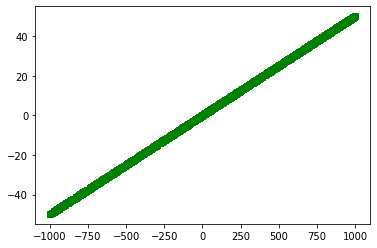

Podział wg det2:
Dla epsilon= 1e-08
Right 0
Left 0
In line 1000
********************************************************


In [43]:
split2(pDx, pDy, a, b,eps4)

## Podział według det3

### Zestaw A

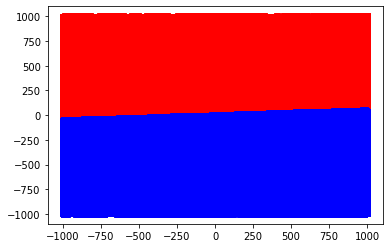

Podział wg det3:
Dla epsilon= 1e-14
Right 49726
Left 50274
In line 0
********************************************************


In [44]:
split3(pAx,pAy,a,b,eps1)

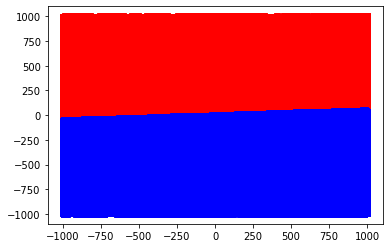

Podział wg det3:
Dla epsilon= 1e-12
Right 49726
Left 50274
In line 0
********************************************************


In [45]:
split3(pAx,pAy,a,b,eps2)

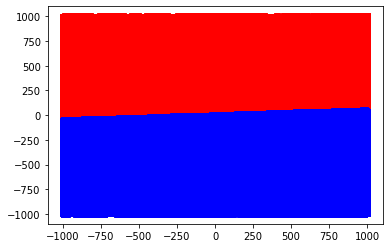

Podział wg det3:
Dla epsilon= 1e-10
Right 49726
Left 50274
In line 0
********************************************************


In [46]:
split3(pAx,pAy,a,b,eps3) 

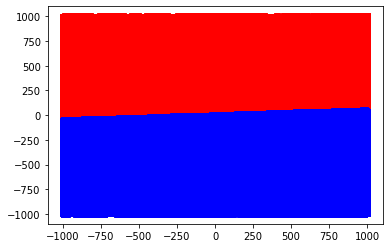

Podział wg det3:
Dla epsilon= 1e-08
Right 49726
Left 50274
In line 0
********************************************************


In [47]:
split3(pAx,pAy,a,b,eps4)

### Zestaw B

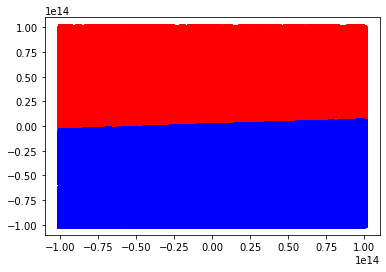

Podział wg det3:
Dla epsilon= 1e-14
Right 49786
Left 50214
In line 0
********************************************************


In [48]:
split3(pBx,pBy,a,b,eps1) 

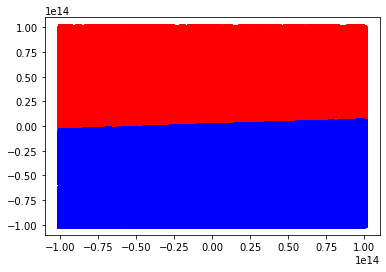

Podział wg det3:
Dla epsilon= 1e-12
Right 49786
Left 50214
In line 0
********************************************************


In [49]:
split3(pBx,pBy,a,b,eps2)  

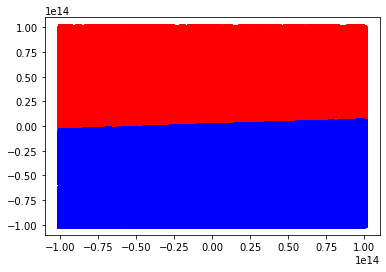

Podział wg det3:
Dla epsilon= 1e-10
Right 49786
Left 50214
In line 0
********************************************************


In [50]:
split3(pBx,pBy,a,b,eps3) 

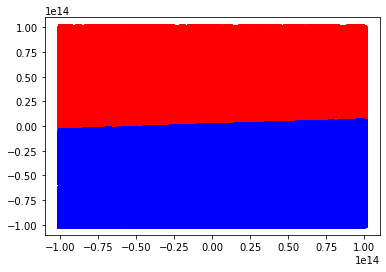

Podział wg det3:
Dla epsilon= 1e-08
Right 49786
Left 50214
In line 0
********************************************************


In [51]:
split3(pBx,pBy,a,b,eps4)

### Zestaw C

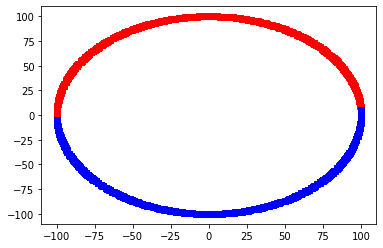

Podział wg det3:
Dla epsilon= 1e-14
Right 516
Left 484
In line 0
********************************************************


In [52]:
split3(pCx, pCy, a, b,eps1)

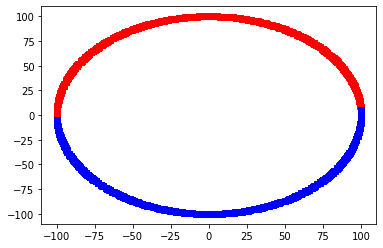

Podział wg det3:
Dla epsilon= 1e-12
Right 516
Left 484
In line 0
********************************************************


In [53]:
split3(pCx, pCy, a, b,eps2) 

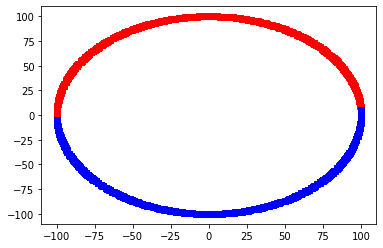

Podział wg det3:
Dla epsilon= 1e-10
Right 516
Left 484
In line 0
********************************************************


In [54]:
split3(pCx, pCy, a, b,eps3)   

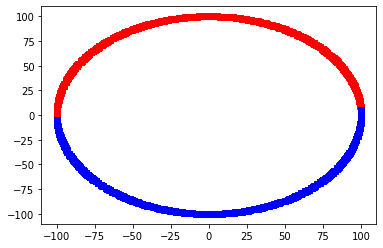

Podział wg det3:
Dla epsilon= 1e-08
Right 516
Left 484
In line 0
********************************************************


In [55]:
split3(pCx, pCy, a, b, eps4)

### Zestaw D

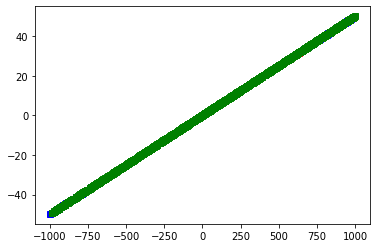

Podział wg det3:
Dla epsilon= 1e-14
Right 100
Left 14
In line 886
********************************************************


In [56]:
split3(pDx, pDy, a, b,eps1) 

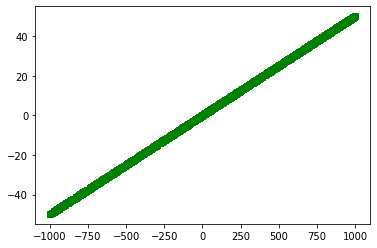

Podział wg det3:
Dla epsilon= 1e-12
Right 0
Left 0
In line 1000
********************************************************


In [57]:
split3(pDx, pDy, a, b,eps2) 

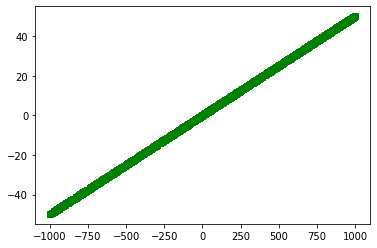

Podział wg det3:
Dla epsilon= 1e-10
Right 0
Left 0
In line 1000
********************************************************


In [58]:
split3(pDx, pDy, a, b,eps3)

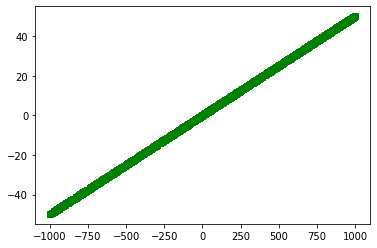

Podział wg det3:
Dla epsilon= 1e-08
Right 0
Left 0
In line 1000
********************************************************


In [59]:
split3(pDx, pDy, a, b,eps4)

## Podział według det4

### Zestaw A

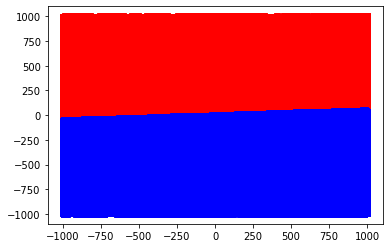

Podział wg det4:
Dla epsilon= 1e-14
Right 49726
Left 50274
In line 0
********************************************************


In [60]:
split4(pAx,pAy,a,b,eps1)

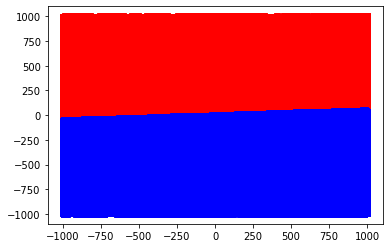

Podział wg det4:
Dla epsilon= 1e-12
Right 49726
Left 50274
In line 0
********************************************************


In [61]:
split4(pAx,pAy,a,b,eps2)

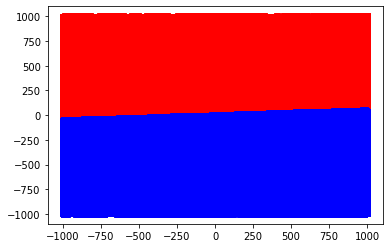

Podział wg det4:
Dla epsilon= 1e-10
Right 49726
Left 50274
In line 0
********************************************************


In [62]:
split4(pAx,pAy,a,b,eps3)

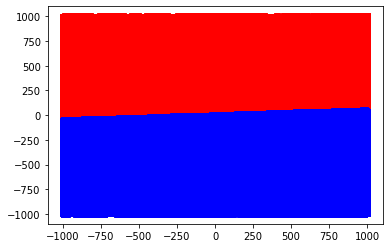

Podział wg det4:
Dla epsilon= 1e-08
Right 49726
Left 50274
In line 0
********************************************************


In [63]:
split4(pAx,pAy,a,b,eps4) 

### Zestaw B

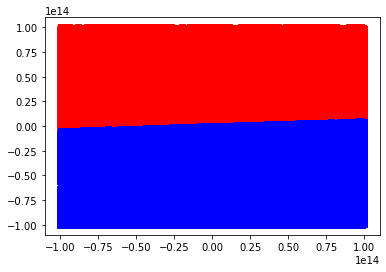

Podział wg det4:
Dla epsilon= 1e-14
Right 49785
Left 50215
In line 0
********************************************************


In [64]:
split4(pBx,pBy,a,b,eps1)

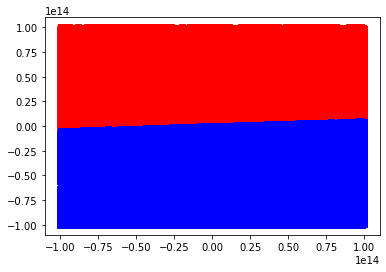

Podział wg det4:
Dla epsilon= 1e-12
Right 49785
Left 50215
In line 0
********************************************************


In [65]:
split4(pBx,pBy,a,b,eps2)

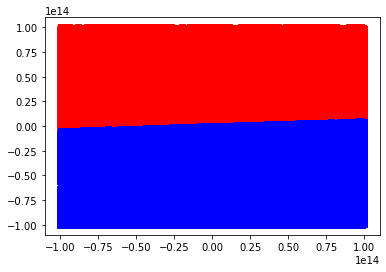

Podział wg det4:
Dla epsilon= 1e-10
Right 49785
Left 50215
In line 0
********************************************************


In [66]:
split4(pBx,pBy,a,b,eps3)

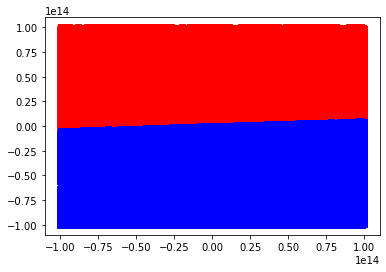

Podział wg det4:
Dla epsilon= 1e-08
Right 49785
Left 50215
In line 0
********************************************************


In [67]:
split4(pBx,pBy,a,b,eps4)   

### Zestaw C

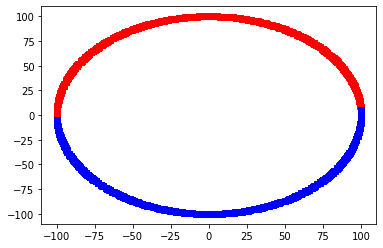

Podział wg det4:
Dla epsilon= 1e-14
Right 516
Left 484
In line 0
********************************************************


In [68]:
split4(pCx, pCy, a, b,eps1)

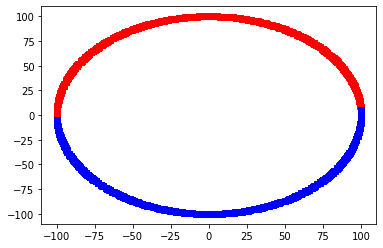

Podział wg det4:
Dla epsilon= 1e-12
Right 516
Left 484
In line 0
********************************************************


In [69]:
split4(pCx, pCy, a, b,eps2)

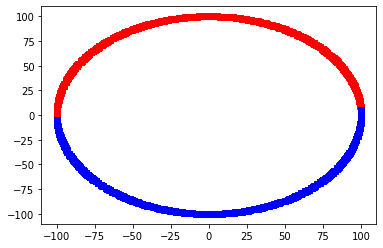

Podział wg det4:
Dla epsilon= 1e-10
Right 516
Left 484
In line 0
********************************************************


In [70]:
split4(pCx, pCy, a, b,eps3) 

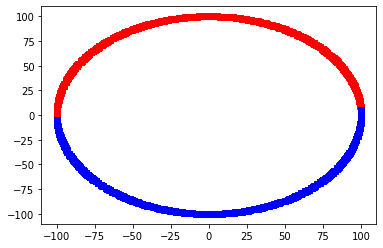

Podział wg det4:
Dla epsilon= 1e-08
Right 516
Left 484
In line 0
********************************************************


In [71]:
split4(pCx, pCy, a, b, eps4)

### Zestaw D

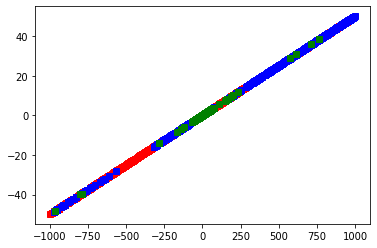

Podział wg det4:
Dla epsilon= 1e-14
Right 446
Left 460
In line 94
********************************************************


In [72]:
split4(pDx, pDy, a, b,eps1)

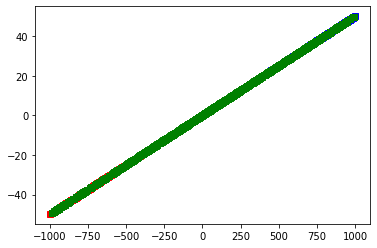

Podział wg det4:
Dla epsilon= 1e-12
Right 126
Left 139
In line 735
********************************************************


In [73]:
split4(pDx, pDy, a, b,eps2)  

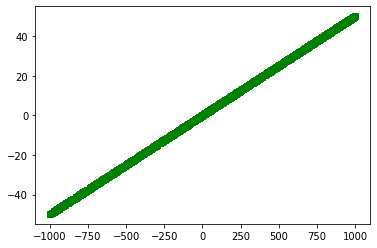

Podział wg det4:
Dla epsilon= 1e-10
Right 0
Left 0
In line 1000
********************************************************


In [74]:
split4(pDx, pDy, a, b,eps3)

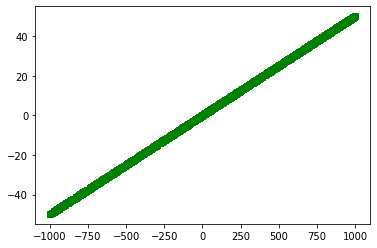

Podział wg det4:
Dla epsilon= 1e-08
Right 0
Left 0
In line 1000
********************************************************


In [75]:
split4(pDx, pDy, a, b,eps4)

## Punkty które zostały zaklasyfikowane inaczej w zależności od użytego wyznacznika

Funkcje dokonujące podziału punktów na leżące na lewo, na prawo oraz współliniowe względem prostej (dla każdego wyznacznika oddzielna funkcja). 

In [89]:
def sp1(X,Y,a,b,eps):
    
    points =[[] for _ in range(3)]
    
    for i in range(len(X)):
        if det1(a,b,(X[i],Y[i]),eps)==-1:
            points[0].append((X[i],Y[i]))
        elif det1(a,b,(X[i],Y[i]),eps)==1:
            points[1].append((X[i],Y[i]))
        else:
            points[2].append((X[i],Y[i]))
    
    return points
    
    
    
            
def sp2(X,Y,a,b,eps):
    
    points =[[] for _ in range(3)]
    
    for i in range(len(X)):
        if det2(a,b,(X[i],Y[i]),eps)==-1:
            points[0].append((X[i],Y[i]))
        elif det2(a,b,(X[i],Y[i]),eps)==1:
            points[1].append((X[i],Y[i]))
        else:
            points[2].append((X[i],Y[i]))
    
    return points
    
def sp3(X,Y,a,b,eps):
    
    points =[[] for _ in range(3)]
    
    for i in range(len(X)):
        if det3(a,b,(X[i],Y[i]),eps)==-1:
            points[0].append((X[i],Y[i]))
        elif det3(a,b,(X[i],Y[i]),eps)==1:
            points[1].append((X[i],Y[i]))
        else:
            points[2].append((X[i],Y[i]))
    
    return points


def sp4(X,Y,a,b,eps):
    
    points =[[] for _ in range(3)]
    
    for i in range(len(X)):
        if det4(a,b,(X[i],Y[i]),eps)==-1:
            points[0].append((X[i],Y[i]))
        elif det4(a,b,(X[i],Y[i]),eps)==1:
            points[1].append((X[i],Y[i]))
        else:
            points[2].append((X[i],Y[i]))
    
    return points





Funkcje znajdujące punkty różniące się położeniem w zależności od użytego wyznacznika

In [ ]:
def difference(p1,p2):
    
    for i in range(3):
        p1[i].sort()
        p2[i].sort()
    j=0
    i=0
    n1 = len(p1[0])
    n2 = len(p2[0])
    diff = []
    
    
    while i<n1 and j<n2:
        if p1[0][i][0] == p2[0][j][0] and p1[0][i][1] == p2[0][j][1]:
            i+=1
            j+=1
        elif p1[0][i][0] > p2[0][j][0] or (p1[0][i][0] == p2[0][j][0] and p1[0][i][1] > p2[0][j][1]):
            diff.append(p2[0][j])
            j+=1
        else:
            i+=1
    while j<n2:
        diff.append(p2[0][j])
        j+=1
    
    
    j=0
    i=0
    n1 = len(p1[1])
    n2 = len(p2[1])

    while i<n1 and j<n2:
        if p1[1][i][0] == p2[1][j][0] and p1[1][i][1] == p2[1][j][1]:
            i+=1
            j+=1
        elif p1[1][i][0] > p2[1][j][0] or (p1[1][i][0] == p2[1][j][0] and p1[1][i][1] > p2[1][j][1]):
            diff.append(p2[1][j])
            j+=1
        else:
            i+=1
    while j<n2:
        diff.append(p2[1][j])
        j+=1
        
    j=0
    i=0
    n1 = len(p1[2])
    n2 = len(p2[2])

    while i<n1 and j<n2:
        if p1[2][i][0] == p2[2][j][0] and p1[2][i][1] == p2[2][j][1]:
            i+=1
            j+=1
        elif p1[2][i][0] > p2[2][j][0] or (p1[2][i][0] == p2[2][j][0] and p1[2][i][1] > p2[2][j][1]):
            diff.append(p2[2][j])
            j+=1
        else:
            i+=1
    
    while j<n2:
        diff.append(p2[2][j])
        j+=1
    
    
    print("Liczba różnie zaklasyfikowanych punktów: ",len(diff))
    return diff
   
def spl(arr):
    n = len(arr)
    a1 = [0]*n
    a2 = [0]*n
    for i in range(n):
        a1[i] = arr[i][0]
        a2[i] = arr[i][1]
    
    return (a1,a2)


def show_difference(p1,p2):
    diff = difference(p1,p2)
    d1, d2 = spl(diff)
    pyplot.plot(d1,d2,'rs')
    pyplot.show()


### Punkty, które zostały zaklasyfikowane inaczej przez det1 i det2 (dla eps1 = 10**(-14))

Liczba różnie zaklasyfikowanych punktów:  286


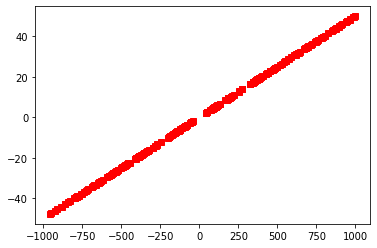

In [77]:
p1= sp1(pDx,pDy,a,b,eps1)
p2 = sp2(pDx,pDy,a,b,eps1)
show_difference(p1,p2)

### Punkty, które zostały zaklasyfikowane inaczej przez det1 i det3 (dla eps1 = 10**(-14))

Liczba różnie zaklasyfikowanych punktów:  114


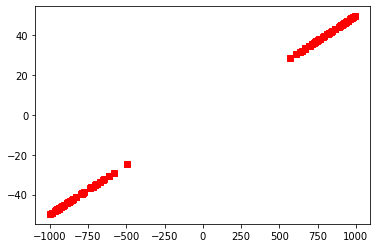

In [78]:
p1= sp1(pDx,pDy,a,b,eps1)
p2 = sp3(pDx,pDy,a,b,eps1)
show_difference(p1,p2)

### Punkty, które zostały zaklasyfikowane inaczej przez det1 i det4 (dla eps1 = 10**(-14))

Liczba różnie zaklasyfikowanych punktów:  906


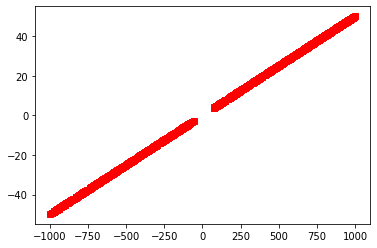

In [79]:
p1= sp1(pDx,pDy,a,b,eps1)
p2 = sp4(pDx,pDy,a,b,eps1)
show_difference(p1,p2)

### Punkty, które zostały zaklasyfikowane inaczej przez det2 i det3 (dla eps1 = 10**(-14))

Liczba różnie zaklasyfikowanych punktów:  368


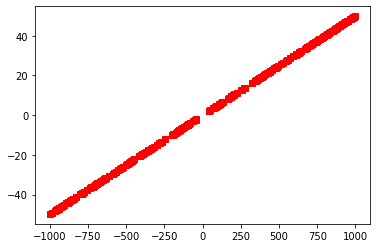

In [80]:
p1= sp2(pDx,pDy,a,b,eps1)
p2 = sp3(pDx,pDy,a,b,eps1)
show_difference(p1,p2)

### Punkty, które zostały zaklasyfikowane inaczej przez det2 i det4 (dla eps1 = 10**(-14))

Liczba różnie zaklasyfikowanych punktów:  687


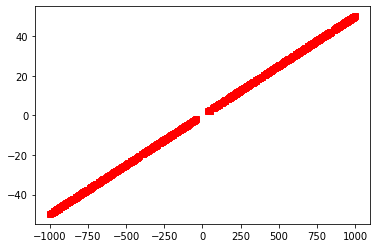

In [81]:
p1= sp2(pDx,pDy,a,b,eps1)
p2 = sp4(pDx,pDy,a,b,eps1)
show_difference(p1,p2)

### Punkty, które zostały zaklasyfikowane inaczej przez det3 i det4 (dla eps1 = 10**(-14))

Liczba różnie zaklasyfikowanych punktów:  846


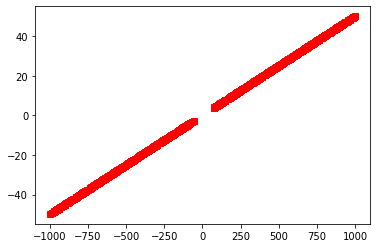

In [82]:
p1= sp3(pDx,pDy,a,b,eps1)
p2 = sp4(pDx,pDy,a,b,eps1)
show_difference(p1,p2)

### Punkty, które zostały zaklasyfikowane inaczej przez det1 i det2 (dla eps2 = 10**(-12))

Liczba różnie zaklasyfikowanych punktów:  150


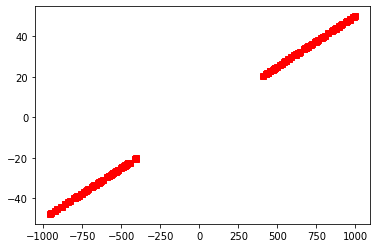

In [83]:
p1= sp1(pDx,pDy,a,b,eps2)
p2 = sp2(pDx,pDy,a,b,eps2)
show_difference(p1,p2)

### Punkty, które zostały zaklasyfikowane inaczej przez det1 i det3 (dla eps2 = 10**(-12))

Liczba różnie zaklasyfikowanych punktów:  0


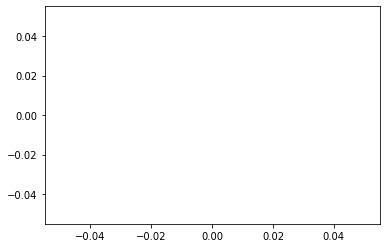

In [84]:
p1= sp1(pDx,pDy,a,b,eps2)
p2 = sp3(pDx,pDy,a,b,eps2)
show_difference(p1,p2)

### Punkty, które zostały zaklasyfikowane inaczej przez det1 i det4 (dla eps2 = 10**(-12))

Liczba różnie zaklasyfikowanych punktów:  265


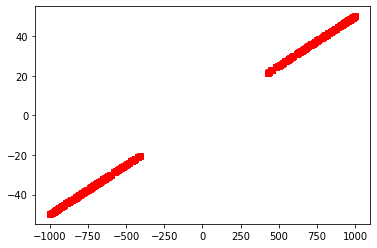

In [85]:
p1= sp1(pDx,pDy,a,b,eps2)
p2 = sp4(pDx,pDy,a,b,eps2)
show_difference(p1,p2)

### Punkty, które zostały zaklasyfikowane inaczej przez det2 i det3 (dla eps2 = 10**(-12))

Liczba różnie zaklasyfikowanych punktów:  150


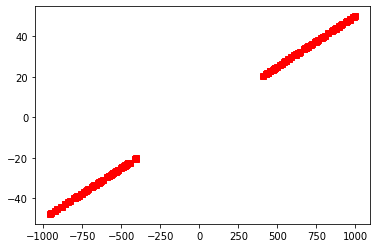

In [86]:
p1= sp2(pDx,pDy,a,b,eps2)
p2 = sp3(pDx,pDy,a,b,eps2)
show_difference(p1,p2)

### Punkty, które zostały zaklasyfikowane inaczej przez det2 i det4 (dla eps2 = 10**(-12))

Liczba różnie zaklasyfikowanych punktów:  287


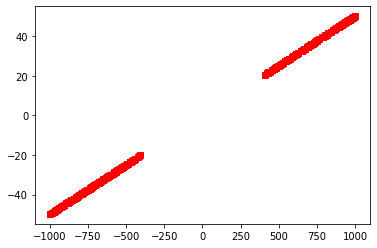

In [87]:
p1= sp2(pDx,pDy,a,b,eps2)
p2 = sp4(pDx,pDy,a,b,eps2)
show_difference(p1,p2)

### Punkty, które zostały zaklasyfikowane inaczej przez det3 i det4 (dla eps2 = 10**(-12))

Liczba różnie zaklasyfikowanych punktów:  265


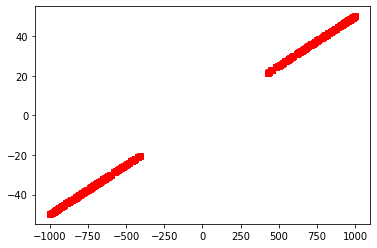

In [88]:
p1= sp3(pDx,pDy,a,b,eps2)
p2 = sp4(pDx,pDy,a,b,eps2)
show_difference(p1,p2)

### Różnica w klasyfikacji dla zbioru B dla det1 i det2

Liczba różnie zaklasyfikowanych punktów:  8


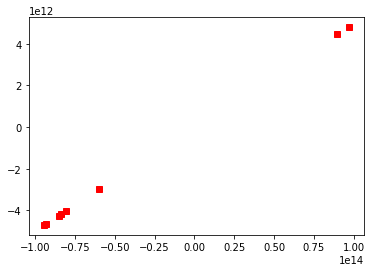

In [93]:
p1= sp1(pBx,pBy,a,b,eps1)
p2 = sp2(pBx,pBy,a,b,eps1)
show_difference(p1,p2)